<a href="https://colab.research.google.com/github/realyou0312/Bigdata-Gisa/blob/main/JY_Kaggle_Bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
bike_df = pd.read_csv('/content/drive/MyDrive/빅분기 실기/Kaggle_Bike_회귀/train.csv')
bike_df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## Object인 datetime 컬럼 가공

In [5]:
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

bike_df['year'] = bike_df.datetime.apply(lambda x : x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x : x.month)
bike_df['day'] = bike_df.datetime.apply(lambda x : x.day)
bike_df['hour'] = bike_df.datetime.apply(lambda x: x.hour)
bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [6]:
drop_columns = ['datetime','casual','registered']
bike_df.drop(drop_columns, axis=1,inplace=True)

## RMSLE / RMSE / MAE

In [8]:
def rmsle(y, pred):
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def evaluate_regr(y,pred):
    rmsle_val = rmsle(y,pred)
    rmse_val = np.sqrt(mean_squared_error(y,pred))
    mae_val = mean_absolute_error(y,pred) # MAE 는 scikit learn의 mean_absolute_error() 로 계산
    print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

## 로그변환 / 피처 인코딩과 모델 학습, 예측, 평가

In [9]:
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso

In [10]:
X = bike_df.drop(['count'],axis=1,inplace=False)
y = bike_df['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

evaluate_regr(y_test ,pred)

RMSLE: 1.179, RMSE: 141.228, MAE: 105.342


In [12]:
y_target_log = np.log1p(y)

# 로그 변환된 y_target_log를 반영
X_train, X_test, y_train, y_test = train_test_split(X, y_target_log, test_size=0.2, random_state=42)
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

# 테스트 데이터 셋의 Target 값은 Log 변환되었으므로 다시 expm1를 이용하여 원래 scale로 변환
y_test_exp = np.expm1(y_test)

# 예측 값 역시 Log 변환된 타겟 기반으로 학습되어 예측되었으므로 다시 exmpl으로 scale변환
pred_exp = np.expm1(pred)

evaluate_regr(y_test_exp ,pred_exp)

RMSLE: 1.026, RMSE: 160.655, MAE: 108.217


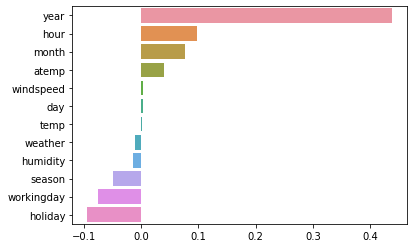

In [13]:
coef = pd.Series(lr_reg.coef_, index=X.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [15]:
X_dum = pd.get_dummies(X, columns=['year', 'month','day', 'hour', 'holiday',
                                              'workingday','season','weather'])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_dum, y_target_log, test_size=0.2, random_state=42)

lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)

y_test = np.expm1(y_test)
pred = np.expm1(pred)

print('###',lr_reg.__class__.__name__,'###')
evaluate_regr(y_test, pred)

### LinearRegression ###
RMSLE: 0.584, RMSE: 94.452, MAE: 61.364


In [28]:
ridge_reg.fit(X_train, y_train)
pred = ridge_reg.predict(X_test)

# y_test = np.expm1(y_test)
pred = np.expm1(pred)

print('###',ridge_reg.__class__.__name__,'###')
evaluate_regr(y_test, pred)

### Ridge ###
RMSLE: 0.586, RMSE: 95.596, MAE: 62.005


In [29]:
lasso_reg.fit(X_train, y_train)
pred = lasso_reg.predict(X_test)

# y_test = np.expm1(y_test)
pred = np.expm1(pred)

print('###',lasso_reg.__class__.__name__,'###')
evaluate_regr(y_test, pred)

### Lasso ###
RMSLE: 0.642, RMSE: 112.179, MAE: 71.845


In [30]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [31]:
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)

In [32]:
rf_reg.fit(X_train, y_train)
pred = rf_reg.predict(X_test)

# y_test = np.expm1(y_test)
pred = np.expm1(pred)

print('###',rf_reg.__class__.__name__,'###')
evaluate_regr(y_test, pred)

### RandomForestRegressor ###
RMSLE: 0.347, RMSE: 47.134, MAE: 29.301


In [33]:
gbm_reg.fit(X_train, y_train)
pred = gbm_reg.predict(X_test)

# y_test = np.expm1(y_test)
pred = np.expm1(pred)

print('###',gbm_reg.__class__.__name__,'###')
evaluate_regr(y_test, pred)

### GradientBoostingRegressor ###
RMSLE: 0.338, RMSE: 52.700, MAE: 32.510


In [34]:
xgb_reg.fit(X_train, y_train)
pred = xgb_reg.predict(X_test)

# y_test = np.expm1(y_test)
pred = np.expm1(pred)

print('###',xgb_reg.__class__.__name__,'###')
evaluate_regr(y_test, pred)

[16:01:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
### XGBRegressor ###
RMSLE: 0.340, RMSE: 53.653, MAE: 33.096
